<a href="https://colab.research.google.com/github/LiaLiz2000/Machine-Learning/blob/main/Arboles_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar y ajustar modelos de árboles de decisión y bosques aleatorios utilizando Scikit-learn.

Se utilizará el dataset iris

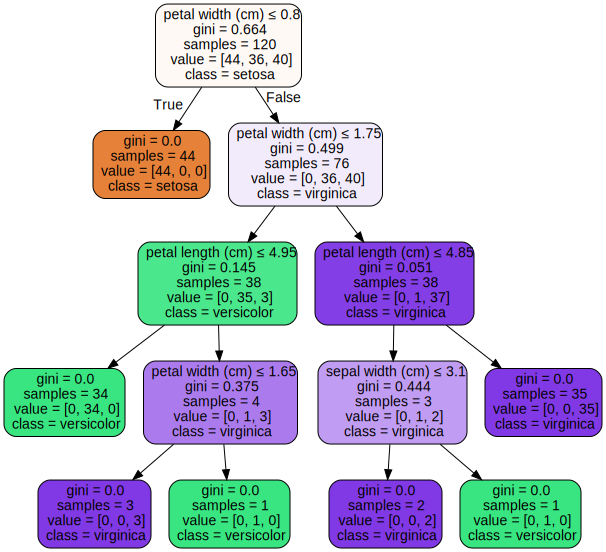

In [29]:
#importar dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

#dividir el conjunto del dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

#Ajustar el modelo del árbol de decisión
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#Visualizar el arbol
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

dot_data = export_graphviz (
    clf,
    out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Convertir a gráfico con Graphviz
graph = graphviz.Source(dot_data)
display(graph)





In [30]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)


#informe de clasificación valorando diferentes profundidades maximas
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.93      0.93        14
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [31]:
#Bosques Aleatorios

#Aplicar el modelo para hacer predicciones sobre el conjunto de prueba

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#Evaluar el modelo y comparar los resultados con el anterior.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.87      0.93      0.90        14
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



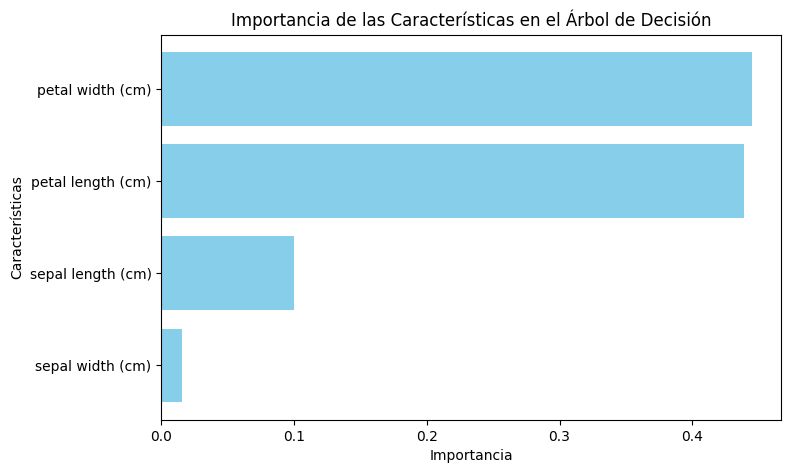

In [38]:
# Obtener la importancia de cada característica
import pandas as pd
import matplotlib.pyplot as plt

importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.gca().invert_yaxis()
plt.show()